Enter a ticker (e.g. AAPL):  AAPL


/var/folders/nl/zjffygcx2qn096gb9h6bfyyc0000gn/T/ipykernel_6577/1858165851.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='1y')
[*********************100%***********************]  1 of 1 completed


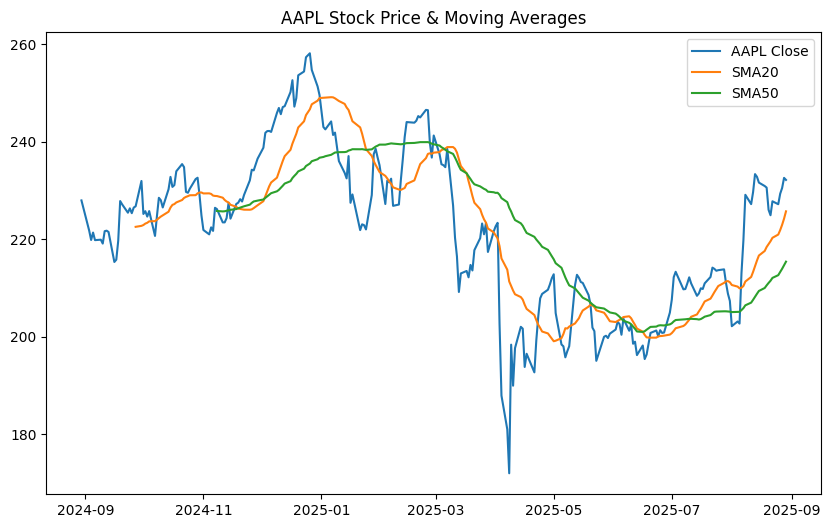


Basic statistics for AAPL:
Mean Return: 0.0003
Volatility (std): 0.0203
Max Price: Ticker
AAPL    258.103729
dtype: float64
Min Price: Ticker
AAPL    171.998993
dtype: float64

Data exported to stock_analysis.xlsx


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def analyze_stock(ticker):
    # Download stock data (already adjusted, no Adj Close column)
    data = yf.download(ticker, period='1y')

    # Calculate daily returns
    data['Daily Return'] = data['Close'].pct_change()

    # Calculate moving averages
    data['SMA20'] = data['Close'].rolling(window=20).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()

    # Basic stats
    stats = {
        'Mean Return': data['Daily Return'].mean(),
        'Volatility (std)': data['Daily Return'].std(),
        'Max Price': data['Close'].max(),
        'Min Price': data['Close'].min()
    }

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label=f'{ticker} Close')
    plt.plot(data['SMA20'], label='SMA20')
    plt.plot(data['SMA50'], label='SMA50')
    plt.title(f'{ticker} Stock Price & Moving Averages')
    plt.legend()
    plt.show()

    return stats, data

# ---- Run single ticker analysis ----
ticker = input('Enter a ticker (e.g. AAPL): ').upper()
stats, data = analyze_stock(ticker)

print(f'\nBasic statistics for {ticker}:')
for k, v in stats.items():
    print(f'{k}: {v:.4f}' if isinstance(v, float) else f'{k}: {v}')

# Save to Excel
output_file = 'stock_analysis.xlsx'
data.to_excel(output_file, sheet_name=ticker)
print(f'\nData exported to {output_file}')
